In [53]:
# warning 나오지 않게하기
import warnings
warnings.filterwarnings('ignore')

In [54]:
# google drive mount (구글 드라이브 연결)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# 경로 설정
import os
os.chdir("/content/drive/MyDrive")
os.getcwd()

'/content/drive/MyDrive'

In [56]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [57]:
'''
SHAP (SHapley Additive exPlanations)
  * game theory : 여러 주제가 서로 영향을 미치는 상황에서 어떤 의사결정이나 행동을 하는지에 대한 이론
  * SHAPLEY Value는 모든 가능한 조합에 대해서 하나의 Feature의 기여도를 종합적으로 합한 값
  * Feature 중요도는 예측에 가장 큰 영향을 주는 변수를 찾는 기법을 구현해 놓은 라이브러리
'''
%pip install shap

In [58]:
import pandas as pd
df = pd.read_csv('data/vehicle_train.csv')

In [59]:
df.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

> **분석 데이터 확인하기**

* 데이터 컬럼의미

|컬럼|내용|
|------|---|
|id|아이디|
|base_date|날짜|
|day_of_week|요일|
|base_hour|시간대|
|lane_count|차로수|
|road_rating|도로등급|
|road_name|도로명|
|multi_linked|중용구간 여부|
|connect_code|연결로 코드|
|maximum_speed_limit|최고속도제한|
|vehicle_restricted|통과제한차량|
|weight_restricted|통과제한하중|
|height_restricted|통과제한높이|
|road_type|도로유형|
|start_node_name|시작지점명|
|start_latitude|시작지점의 위도|
|start_longitude|시작지점의 경도|
|start_turn_restricted|시작 지점의 회전제한 유무|
|end_node_name|도착지점명|
|end_latitude|도착지점의 위도|
|end_longitude|도착지점의 경도|
|end_turn_restricted|도착 지점의 회전제한 유무|
|target|평균속도(km)|


In [61]:
df.shape

(4701217, 23)

In [62]:
df.dtypes

id                        object
base_date                  int64
day_of_week               object
base_hour                  int64
lane_count                 int64
road_rating                int64
road_name                 object
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_node_name           object
start_latitude           float64
start_longitude          float64
start_turn_restricted     object
end_node_name             object
end_latitude             float64
end_longitude            float64
end_turn_restricted       object
target                   float64
dtype: object

> **뱡향**

★ 수집된 데이터를 기반으로 모델링에 필요한 데이터를 선별해야 함


★ 선별된 데이터 중 좌표 기반으로 데이터를 지도에 시각화 예정


★ 모델링 기술(사이킷런) 활용해 모델 학습하기

★ Feature Selection에 대한 실제 검증하기

★ 사용할 알고리즘 중 더 정확한 것이 어떤건지 평가하고 실제 예측값을 지도에 표시해 보기 (Data Visualization)
- Random Forest
- XGBoost

> **측정**


- 속도 예측 정확도

In [63]:
import json
import numpy as np
from pandas.api.types import CategoricalDtype
import plotly.express as px   # 시각화 - plotly 플롯 기반
import folium    # 지도 그리기
from sklearn.ensemble import RandomForestRegressor #RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   # Normal distribution
from sklearn.metrics import mean_absolute_percentage_error

In [64]:
import shap

shap.initjs()

In [65]:
df.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


In [66]:
map_data = df.groupby('road_name')['target'].mean()     # 각 도로명에 대한 target 값의 평균

In [67]:
map_data

road_name
-         44.774556
경찰로       24.686785
고평교       36.126862
관광단지1로    39.292453
관광단지2로    34.469287
            ...    
첨단로       47.246703
태평로       25.030004
한천로       22.745260
호근로       32.086882
호서중앙로     32.510819
Name: target, Length: 61, dtype: float64

In [68]:
# 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude' 값들을 기준으로 데이터를 그룹화하고 각 그룹에 대한 target열의 평균
# target값에 따라 내림차순으로 정렬
load_data = df.groupby(['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'])['target'].mean().reset_index().sort_values('target',ascending=False)

In [69]:
load_data

,start_latitude,start_longitude,end_latitude,end_longitude,target
296,33.298938,126.333934,33.298624,126.333607,81.150366
330,33.321270,126.350778,33.320921,126.350630,80.933483
335,33.322851,126.351447,33.321270,126.350778,80.933483
327,33.320921,126.350630,33.311538,126.345810,80.933296
493,33.419479,126.405897,33.421109,126.407259,78.074432
...,...,...,...,...,...
624,33.461055,126.444333,33.460157,126.446843,14.929801
867,33.519832,126.588049,33.521399,126.587288,14.533360
743,33.489940,126.490153,33.490078,126.486558,13.518895
651,33.468664,126.678235,33.437249,126.677154,11.729073


In [70]:
map = folium.Map(location=[33.298938, 126.333934], zoom_start=12)
#folium.Marker([33.298938, 126.333934], popup='Start', icon=folium.Icon(color='blue')).add_to(map)
#folium.Marker([33.298624, 126.333607], popup='End', icon=folium.Icon(color='blue')).add_to(map)

def traffic_line(x):
  if x['target'] > 80: target_color='green'
  elif x['target'] > 50: target_color='blue'
  elif x['target'] > 30: target_color='orange'
  else: target_color='red'
  folium.PolyLine(locations=[[x['start_latitude'], x['start_longitude']], [x['end_latitude'], x['end_longitude']]], tooltip='PolyLine', color=target_color).add_to(map)

load_data.apply(traffic_line,axis=1)
map

## 데이터 선별
* 수집된 데이터의 기본 정보들 확인

(1) 유사한 정보를 가진 데이터 컬럼 확인하고 제거

(2) 문자열 자료형 데이터를 변환

(3) 실제 교통량에 영향을 줄수 있을 것 같은 컬럼들 탐색

In [71]:
# 데이터가 저장된 컬럼을 리스트로 나열하기
df.columns.tolist()

['id',
 'base_date',
 'day_of_week',
 'base_hour',
 'lane_count',
 'road_rating',
 'road_name',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'vehicle_restricted',
 'weight_restricted',
 'height_restricted',
 'road_type',
 'start_node_name',
 'start_latitude',
 'start_longitude',
 'start_turn_restricted',
 'end_node_name',
 'end_latitude',
 'end_longitude',
 'end_turn_restricted',
 'target']

In [72]:
# 숫자형 타입 컬럼들
num_colums = df.select_dtypes(include=np.number).columns.tolist()
num_colums

['base_date',
 'base_hour',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'vehicle_restricted',
 'weight_restricted',
 'height_restricted',
 'road_type',
 'start_latitude',
 'start_longitude',
 'end_latitude',
 'end_longitude',
 'target']

In [73]:
# 문자형 타입 컬럼들
obj_colums = df.select_dtypes(include=object).columns.tolist()
obj_colums

['id',
 'day_of_week',
 'road_name',
 'start_node_name',
 'start_turn_restricted',
 'end_node_name',
 'end_turn_restricted']

In [74]:
df.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


In [75]:
# start_node_name과 end_node_name은 해당 지역 이름인데, 그 지역을 나타내는 latitude과 longitude가 상관관계가 높음
# road_name의 경우 비어있는 행이 많음
# id도 모델링에 있어서 유의미하지 않음
df[['id', 'day_of_week', 'road_name', 'start_node_name', 'end_node_name']]

,id,day_of_week,road_name,start_node_name,end_node_name
0,TRAIN_0000000,목,지방도1112호선,제3교래교,제3교래교
1,TRAIN_0000001,목,일반국도11호선,광양사거리,KAL사거리
2,TRAIN_0000002,일,일반국도16호선,창고천교,상창육교
3,TRAIN_0000003,금,태평로,남양리조트,서현주택
4,TRAIN_0000004,화,일반국도12호선,애월샷시,애월입구
...,...,...,...,...,...
4701212,TRAIN_4701212,목,-,대림사거리,금덕해운
4701213,TRAIN_4701213,목,-,광삼교,광삼교
4701214,TRAIN_4701214,월,일반국도12호선,고성교차로,성산교차로
4701215,TRAIN_4701215,수,일반국도95호선,제6광령교,관광대학입구


## Feature Engineering

* 수집된 데이터를 모델의 입력값으로 사용할 수 있는 형태로 변환 및 가공처리



In [76]:
# 날짜 관련 데이터 추출
# 대문자 Y는 네자리수 담는 포맷, m은 01~12까지 12개를 담을 수 있는 포맷, d는 01~31일까지 담을수 있는 포맷(%Y%m%d)
df['base_date'] = pd.to_datetime(df['base_hour'], format='%Y-%m-%d')    # 20220623 -> 2022-06-23
df['year'] = df['base_date'].dt.year
df['month'] = df['base_date'].dt.month
df['dayofweek'] = df['base_date'].dt.dayofweek     #day_of_week 월화수목금토일

# 문자열 데이터를 갖고 있는 컬럼들을 삭제하면 나머지는 다 숫자가 들어가 있음
# 두개 컬럼(start_turn_restricted, end_turn_restricted)은 Boolean(0,1)로 변환예정
df = df.drop(['id', 'base_date', 'day_of_week', 'road_name', 'start_node_name', 'end_node_name'], axis=1)
df

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,target,year,month,dayofweek
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,없음,33.427749,126.662335,없음,52.0,1970,1,3
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,있음,33.504811,126.526240,없음,30.0,1970,1,3
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,없음,33.280072,126.362147,없음,61.0,1970,1,3
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,없음,33.245565,126.566228,없음,20.0,1970,1,3
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,없음,33.462677,126.330152,없음,38.0,1970,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,없음,33.420955,126.273750,없음,20.0,1970,1,3
4701213,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,없음,33.472525,126.424890,없음,65.0,1970,1,3
4701214,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,없음,33.444121,126.912948,없음,30.0,1970,1,3
4701215,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,없음,33.444996,126.433332,없음,73.0,1970,1,3


In [77]:
# Boolean 형으로 변수 추출하기 (start_turn_restricted, end_turn_restricted)
# df[df['start_turn_restricted'] == '없음'] = 0
# df[df['end_turn_restricted'] == '있음'] = 1

# df.loc['start_turn_restricted' == '없음', 'start_turn_restricted'] = 0

df['start_turn_restricted'] = df['start_turn_restricted'].astype('category').cat.codes
df['end_turn_restricted'] = df['end_turn_restricted'].astype('category').cat.codes
df

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,target,year,month,dayofweek
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,0,33.427749,126.662335,0,52.0,1970,1,3
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,1,33.504811,126.526240,0,30.0,1970,1,3
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,0,33.280072,126.362147,0,61.0,1970,1,3
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,0,33.245565,126.566228,0,20.0,1970,1,3
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,0,33.462677,126.330152,0,38.0,1970,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,0,33.420955,126.273750,0,20.0,1970,1,3
4701213,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,0,33.472525,126.424890,0,65.0,1970,1,3
4701214,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,0,33.444121,126.912948,0,30.0,1970,1,3
4701215,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,0,33.444996,126.433332,0,73.0,1970,1,3


In [78]:
df.dtypes

base_hour                  int64
lane_count                 int64
road_rating                int64
multi_linked               int64
connect_code               int64
maximum_speed_limit      float64
vehicle_restricted       float64
weight_restricted        float64
height_restricted        float64
road_type                  int64
start_latitude           float64
start_longitude          float64
start_turn_restricted       int8
end_latitude             float64
end_longitude            float64
end_turn_restricted         int8
target                   float64
year                       int64
month                      int64
dayofweek                  int64
dtype: object

In [79]:
df.isnull().sum()         # null 값 없음

base_hour                0
lane_count               0
road_rating              0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
year                     0
month                    0
dayofweek                0
dtype: int64

In [80]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
base_hour,4701217.0,11.93,6.72,0.00,6.00,12.00,18.00,23.00
lane_count,4701217.0,1.84,0.69,1.00,1.00,2.00,2.00,3.00
road_rating,4701217.0,104.96,1.84,103.00,103.00,106.00,107.00,107.00
multi_linked,4701217.0,0.00,0.02,0.00,0.00,0.00,0.00,1.00
connect_code,4701217.0,0.27,5.23,0.00,0.00,0.00,0.00,103.00
maximum_speed_limit,4701217.0,61.25,12.13,30.00,50.00,60.00,70.00,80.00
vehicle_restricted,4701217.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
weight_restricted,4701217.0,5618.74,13953.43,0.00,0.00,0.00,0.00,50000.00
height_restricted,4701217.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
road_type,4701217.0,0.62,1.21,0.00,0.00,0.00,0.00,3.00


In [81]:
len(df.columns.tolist())     # 추출한 컬럼은 20개임

20

In [82]:
df.shape

(4701217, 20)

In [83]:
# 학습 - 많은 시간 소요 예상
y = df.pop('target')
X = df

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Random Forest
- Bagging 대표 알고리즘
- Boostraing 기반으로 Weak Tree를 생성한 후 선형 결합
- 모든 변수를 기반으로 Tree 생성

## XGB (XGBoost)  

In [85]:
rf_obj = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, verbose=1, random_state=0)
rf_obj.fit(X_train_std, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.9min finished


RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=0, verbose=1)

In [86]:
predicted_train = rf_obj.predict(X_train_std)
print(f"{mean_absolute_percentage_error(predicted_train, y_train)}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.8s


0.20098176370201384


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   15.4s finished


In [87]:
# 20%씩 오차가 남
# 예를 들어 실제 교통 상태가 50km임.  내가 예측한 속도는 40km 아니면 60km임.
# 평균 20% 오차가 남

In [88]:
predicted_test = rf_obj.predict(X_test_std)
print(f"{mean_absolute_percentage_error(predicted_test, y_test)}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s


0.20100248133479878


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.1s finished


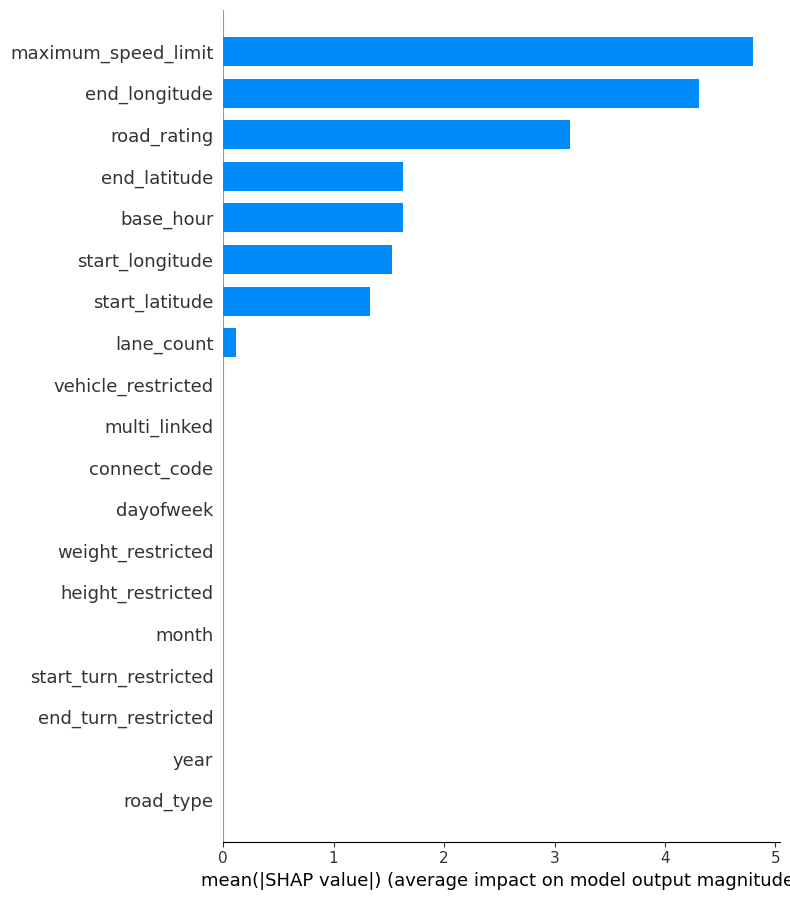

In [89]:
explainer = shap.Explainer(rf_obj)
shap_values = explainer(X_test_std)
shap.summary_plot(shap_values, X_test, plot_type="bar")

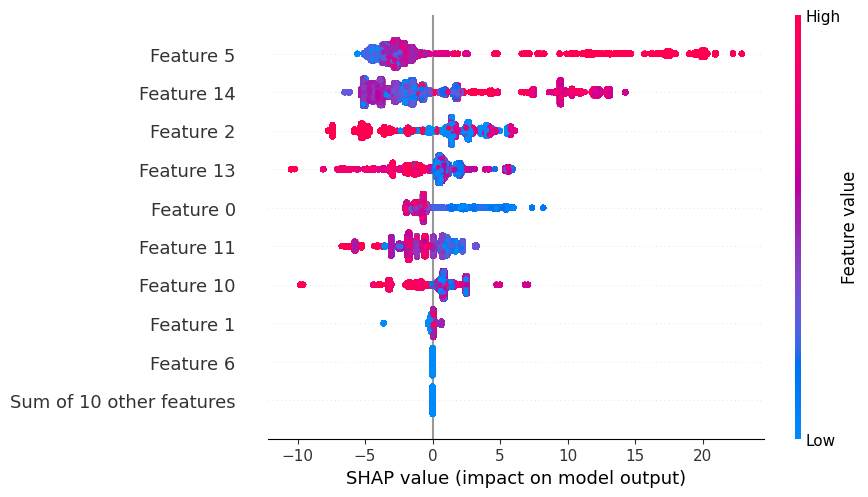

In [90]:
shap.plots.beeswarm(shap_values)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X[['maximum_speed_limit', 'end_longitude', 'road_rating', 'end_latitude', 'base_hour', 'start_longitude', 'start_latitude', 'lane_count']], y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rf_obj = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, verbose=1, random_state=0)
rf_obj.fit(X_train_std, y_train)

predicted_train = rf_obj.predict(X_train_std)
print(f"{mean_absolute_percentage_error(predicted_train, y_train)}")

predicted_test = rf_obj.predict(X_test_std)
print(f"{mean_absolute_percentage_error(predicted_test, y_test)}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   13.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.20098176370201384


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.4s


0.20100248133479878


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.3s finished


In [92]:
import xgboost

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X[['maximum_speed_limit', 'end_longitude', 'road_rating', 'end_latitude', 'base_hour', 'start_longitude', 'start_latitude', 'lane_count']], y, test_size=0.2, random_state=0)

'''
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
'''

xgb_obj = xgboost.XGBRegressor(n_estimators=100, max_depth=5)
xgb_obj.fit(X_train_std, y_train)

xgb_predicted_train = xgb_obj.predict(X_train_std)
print(f"{mean_absolute_percentage_error(xgb_predicted_train, y_train)}")

xgb_predicted_test = xgb_obj.predict(X_test_std)
print(f"{mean_absolute_percentage_error(xgb_predicted_test, y_test)}")

0.1166102491180198
0.11666033378532444


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

'''
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
'''

xgb_obj = xgboost.XGBRegressor(n_estimators=100, max_depth=5)
xgb_obj.fit(X_train_std, y_train)

xgb_predicted_train = xgb_obj.predict(X_train_std)
print(f"{mean_absolute_percentage_error(xgb_predicted_train, y_train)}")

xgb_predicted_test = xgb_obj.predict(X_test_std)
print(f"{mean_absolute_percentage_error(xgb_predicted_test, y_test)}")

0.1166102491180198
0.11666033378532444


In [95]:
#explainer = shap.Explainer(xgb_obj)
#shap_values = explainer(X_test)
#shap.summary_plot(shap_values, X_test, plot_type="bar")

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X[['maximum_speed_limit', 'end_longitude', 'road_rating', 'end_latitude', 'base_hour', 'start_longitude', 'start_latitude', 'lane_count']], y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_test['pred'] = rf_obj.predict(X_test_std)
X_test['real'] = y_test

X_test['difference'] = abs(X_test['pred'] - X_test['real']) / X_test['real']     # APE (absolute percentage error)
X_test


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.1s finished


,maximum_speed_limit,end_longitude,road_rating,end_latitude,base_hour,start_longitude,start_latitude,lane_count,pred,real,difference
2496174,80.0,126.738379,103,33.554302,18,126.736681,33.555316,2,43.465535,33.0,0.317137
2103537,70.0,126.567678,103,33.254628,2,126.565958,33.254233,3,35.735700,38.0,0.059587
3275898,60.0,126.864244,107,33.402546,12,126.874796,33.401188,1,51.151668,33.0,0.550051
2004567,50.0,126.720591,107,33.283593,14,126.723306,33.284189,1,45.189580,45.0,0.004213
4360316,60.0,126.912948,103,33.444121,20,126.912579,33.447183,2,33.826830,37.0,0.085761
...,...,...,...,...,...,...,...,...,...,...,...
3728595,70.0,126.486558,103,33.490078,5,126.483507,33.488395,3,41.748359,40.0,0.043709
3863964,50.0,126.849279,103,33.344628,13,126.850113,33.345240,2,45.189580,34.0,0.329105
3943981,70.0,126.616461,103,33.529889,7,126.613582,33.527867,2,51.151668,53.0,0.034874
563142,30.0,126.412607,107,33.251812,10,126.412163,33.251003,1,34.692271,34.0,0.020361


In [97]:
import seaborn as sns

<Axes: ylabel='Density'>

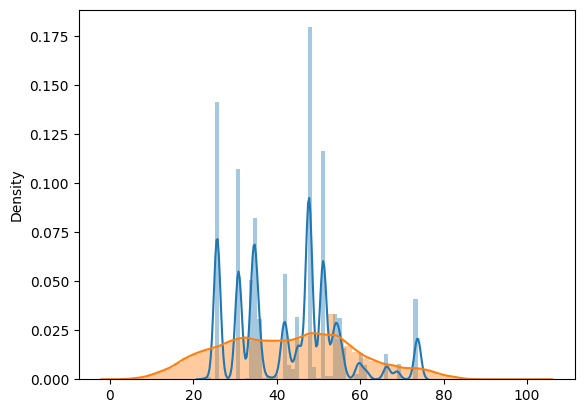

In [98]:
sns.distplot(X_test[['pred']])
sns.distplot(X_test[['real']])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
xgb_obj = xgboost.XGBRegressor(n_estimators=100, max_depth=5)
xgb_obj.fit(X_train, y_train)

X_test['pred'] = xgb_obj.predict(X_test)
X_test['real'] =  y_test
X_test['difference'] = abs(X_test['pred'] - X_test['real']) / X_test['real']
X_test

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,...,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,year,month,dayofweek,pred,real,difference
2496174,18,2,103,0,0,80.0,0.0,0.0,0.0,0,...,0,33.554302,126.738379,0,1970,1,3,31.226442,33.0,0.053744
2103537,2,3,103,0,0,70.0,0.0,0.0,0.0,0,...,0,33.254628,126.567678,0,1970,1,3,38.844578,38.0,0.022226
3275898,12,1,107,0,0,60.0,0.0,0.0,0.0,0,...,0,33.402546,126.864244,0,1970,1,3,35.911644,33.0,0.088232
2004567,14,1,107,0,0,50.0,0.0,0.0,0.0,0,...,0,33.283593,126.720591,0,1970,1,3,42.962826,45.0,0.045271
4360316,20,2,103,0,0,60.0,0.0,0.0,0.0,0,...,0,33.444121,126.912948,0,1970,1,3,29.057943,37.0,0.214650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728595,5,3,103,0,0,70.0,0.0,0.0,0.0,0,...,1,33.490078,126.486558,1,1970,1,3,35.064354,40.0,0.123391
3863964,13,2,103,0,0,50.0,0.0,0.0,0.0,0,...,0,33.344628,126.849279,0,1970,1,3,43.293060,34.0,0.273325
3943981,7,2,103,0,0,70.0,0.0,0.0,0.0,0,...,0,33.529889,126.616461,0,1970,1,3,52.380554,53.0,0.011688
563142,10,1,107,0,0,30.0,0.0,0.0,0.0,0,...,0,33.251812,126.412607,0,1970,1,3,33.190426,34.0,0.023811


<Axes: ylabel='Density'>

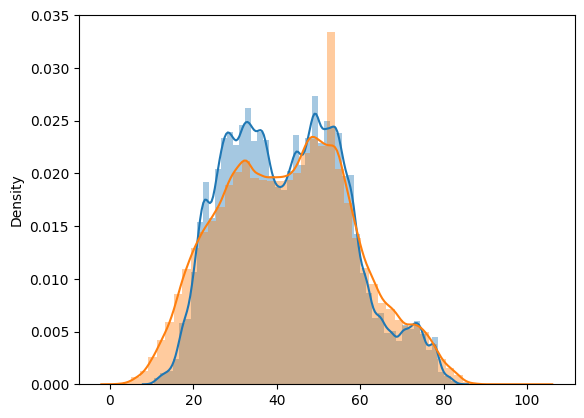

In [101]:
sns.distplot(X_test[['pred']])
sns.distplot(X_test[['real']])

In [102]:
# 최종 목적 : 주어진 Feature의 Target 속도를 예측하는 것 => 좀더 발전적인 형태로 특정 시간의 교통 혼잡 상황을 예측함

In [103]:
# 테스트 데이터는 해당 타겟값이 없음
# 전처리 등 동일하게 ML 분석
test_df = pd.read_csv('data/vehicle_test.csv')

In [104]:
test_df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

In [106]:
test_df['base_date'] = pd.to_datetime(test_df['base_hour'], format='%Y-%m-%d')    # 20220623 -> 2022-06-23
test_df['year'] = test_df['base_date'].dt.year
test_df['month'] = test_df['base_date'].dt.month
test_df['dayofweek'] = test_df['base_date'].dt.dayofweek     #day_of_week 월화수목금토일
test_df = test_df.drop(['id', 'base_date', 'day_of_week', 'road_name', 'start_node_name', 'end_node_name'], axis=1)
test_df['start_turn_restricted'] = test_df['start_turn_restricted'].astype('category').cat.codes
test_df['end_turn_restricted'] = test_df['end_turn_restricted'].astype('category').cat.codes
test_df

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,year,month,dayofweek
0,17,3,107,0,0,70.0,0.0,0.0,0.0,0,33.499427,126.541298,0,33.500772,126.543837,1,1970,1,3
1,12,2,103,0,0,70.0,0.0,0.0,0.0,3,33.258507,126.427003,0,33.258119,126.415840,0,1970,1,3
2,2,1,103,0,0,60.0,0.0,0.0,0.0,0,33.258960,126.476508,0,33.259206,126.474687,0,1970,1,3
3,23,3,103,0,0,70.0,0.0,0.0,0.0,0,33.473494,126.545647,0,33.471061,126.545467,0,1970,1,3
4,17,3,106,0,0,70.0,0.0,0.0,0.0,0,33.501477,126.569223,0,33.496863,126.581230,0,1970,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,5,1,103,0,0,80.0,0.0,0.0,0.0,0,33.472819,126.463030,0,33.470483,126.460846,0,1970,1,3
291237,20,2,103,0,0,60.0,0.0,0.0,0.0,0,33.305359,126.598914,0,33.300796,126.600332,0,1970,1,3
291238,11,1,107,0,0,30.0,0.0,0.0,0.0,0,33.493624,126.496769,1,33.497500,126.496946,1,1970,1,3
291239,7,2,107,0,0,60.0,0.0,0.0,0.0,0,33.254782,126.507014,0,33.255659,126.507333,0,1970,1,3


In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   base_hour              291241 non-null  int64  
 1   lane_count             291241 non-null  int64  
 2   road_rating            291241 non-null  int64  
 3   multi_linked           291241 non-null  int64  
 4   connect_code           291241 non-null  int64  
 5   maximum_speed_limit    291241 non-null  float64
 6   vehicle_restricted     291241 non-null  float64
 7   weight_restricted      291241 non-null  float64
 8   height_restricted      291241 non-null  float64
 9   road_type              291241 non-null  int64  
 10  start_latitude         291241 non-null  float64
 11  start_longitude        291241 non-null  float64
 12  start_turn_restricted  291241 non-null  int8   
 13  end_latitude           291241 non-null  float64
 14  end_longitude          291241 non-nu

In [109]:
X = test_df[['maximum_speed_limit', 'end_longitude', 'road_rating', 'end_latitude', 'base_hour', 'start_longitude', 'start_latitude', 'lane_count']]
X_std = sc.transform(X)

In [110]:
X['pred'] = rf_obj.predict(X_std)     # 랜덤 포레스트 객체에 넣어서 예측하기

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished


In [112]:
map_data = X.groupby(['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'maximum_speed_limit', 'base_hour'])['pred'].mean().reset_index()

In [116]:
map = folium.Map(location=[33.298938, 126.333934], zoom_start=10)
#folium.Marker([33.298938, 126.333934], popup='Start', icon=folium.Icon(color='blue')).add_to(map)
#folium.Marker([33.298624, 126.333607], popup='End', icon=folium.Icon(color='blue')).add_to(map)

def traffic_line(x):
  if x['pred'] > 80: target_color='green'
  elif x['pred'] > 50: target_color='blue'
  elif x['pred'] > 30: target_color='orange'
  else: target_color='red'
  folium.PolyLine(locations=[[x['start_latitude'], x['start_longitude']], [x['end_latitude'], x['end_longitude']]], tooltip='PolyLine', color=target_color).add_to(map)

map_data[map_data['base_hour']==9].apply(traffic_line, axis=1)
map

In [117]:
X = test_df

In [118]:
# XGBoost 모델로 테스트 데이터셋에 대해 예측하기
X['pred'] = xgb_obj.predict(X)

In [119]:
map_data = X.groupby(['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'maximum_speed_limit', 'base_hour'])['pred'].mean().reset_index()

In [124]:
map = folium.Map(location=[33.298938, 126.333934], zoom_start=10)
#folium.Marker([33.298938, 126.333934], popup='Start', icon=folium.Icon(color='blue')).add_to(map)
#folium.Marker([33.298624, 126.333607], popup='End', icon=folium.Icon(color='blue')).add_to(map)

def traffic_line(x):
  if x['pred'] > 80: target_color='green'
  elif x['pred'] > 50: target_color='blue'
  elif x['pred'] > 30: target_color='orange'
  else: target_color='red'
  folium.PolyLine(locations=[[x['start_latitude'], x['start_longitude']], [x['end_latitude'], x['end_longitude']]], tooltip='PolyLine', color=target_color).add_to(map)

map_data[map_data['base_hour']==15].apply(traffic_line, axis=1)
map

##